# Introduction 

Ce rapport présente l’analyse des ventes et des marges par segment sur la période juillet à Décembre 2020.

## L’objectif  : 

- Identifier les segments les plus rentables et ceux où la perte est élevée.

- Comprendre comment évoluent les ventes dans le temps.

- Identifier les produits ou périodes où les pertes sont élevées.

- Analyser les marges afin de voir si elles sont suffisantes.

- Donner des pistes pour améliorer la rentabilité et la stratégie de prix.

##  Synthèse des KPIs

In [1]:
import pandas as pd 

ventes  = pd.read_csv('../data/reports/ventes_seasonal.csv')

ventes['Margin_Loss_Ratio_pct'] = (ventes['MarginRate'] / ventes['LossRate']) * 100
# Exemple de tableau résumé
summary = ventes.groupby('segmentation').agg({
    'MarginRate':'mean',
    'LossRate':'mean',
    'Margin_Loss_Ratio_pct':'mean'
}).reset_index()
summary.rename(columns={
    'MarginRate':'Marge moyenne',
    'LossRate':'Perte moyenne',
    'Margin_Loss_Ratio_pct':'Ratio Marge/Perte (%)'
}, inplace=True)



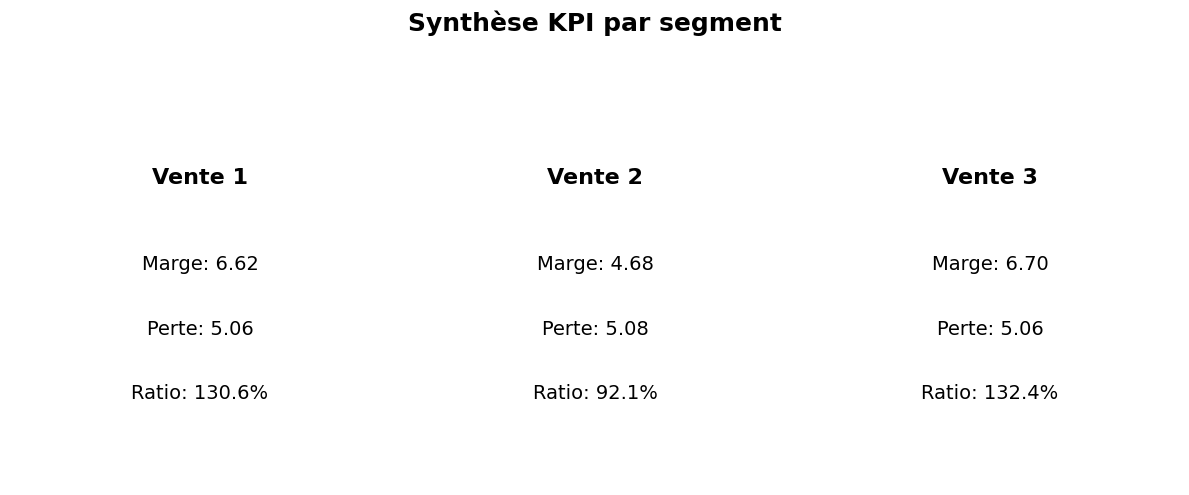

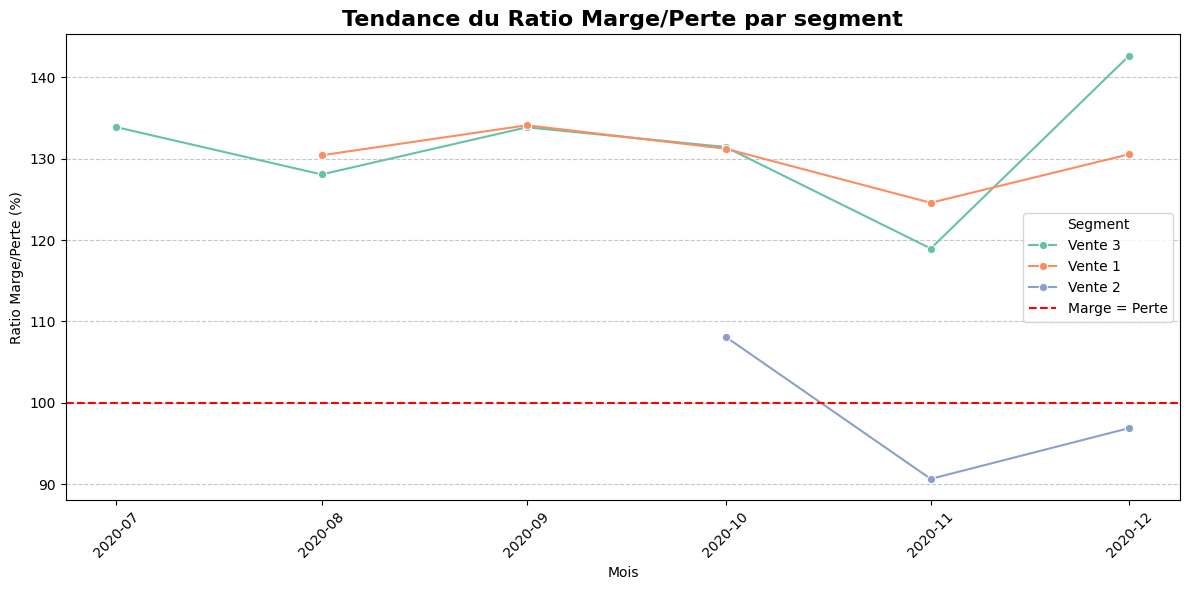

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


if 'SaleDate' in ventes.index.names:
    ventes = ventes.reset_index()


ventes['Date'] = pd.to_datetime(ventes['SaleDate'])
ventes = ventes.sort_values('Date')


seg_labels = {0: "Vente 1", 1: "Vente 2", 2: "Vente 3"}

#  Synthèse KPI par segment 
kpi_summary = ventes.groupby('segmentation').agg(
    Marge_moyenne=('MarginRate', 'mean'),
    Perte_moyenne=('LossRate', 'mean')
)
kpi_summary['Ratio_Marge_Perte_%'] = (kpi_summary['Marge_moyenne'] / kpi_summary['Perte_moyenne']) * 100
kpi_summary.index = kpi_summary.index.map(seg_labels)

 
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
colors = ['#a1d99b', '#fc9272', '#9ecae1'] 
for ax, (seg, row), color in zip(axes, kpi_summary.iterrows(), colors):
    ax.set_facecolor(color)
    ax.text(0.5, 0.7, f"{seg}", fontsize=16, fontweight='bold', ha='center')
    ax.text(0.5, 0.5, f"Marge: {row['Marge_moyenne']:.2f}", fontsize=14, ha='center')
    ax.text(0.5, 0.35, f"Perte: {row['Perte_moyenne']:.2f}", fontsize=14, ha='center')
    ax.text(0.5, 0.2, f"Ratio: {row['Ratio_Marge_Perte_%']:.1f}%", fontsize=14, ha='center')
    ax.axis('off')

plt.suptitle("Synthèse KPI par segment", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


ventes['Month'] = ventes['Date'].dt.to_period('M')

# Calcul du ratio mensuel par segment
trend_data = ventes.groupby(['Month', 'segmentation']).agg(
    Marge_moyenne=('MarginRate', 'mean'),
    Perte_moyenne=('LossRate', 'mean')
).reset_index()

trend_data['Ratio_Marge_Perte_%'] = (trend_data['Marge_moyenne'] / trend_data['Perte_moyenne']) * 100
trend_data['Segmentation'] = trend_data['segmentation'].map(seg_labels)
trend_data['Month'] = trend_data['Month'].dt.to_timestamp()

#  Affichage du graphique 
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=trend_data,
    x='Month',
    y='Ratio_Marge_Perte_%',
    hue='Segmentation',
    marker='o',
    palette="Set2"
)
plt.axhline(100, color='red', linestyle='--', label='Marge = Perte')
plt.title("Tendance du Ratio Marge/Perte par segment", fontsize=16, fontweight='bold')
plt.ylabel("Ratio Marge/Perte (%)")
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- ** Les segments vente 1 et vente 3  sont clairement rentables, avec une marge largement supérieure aux pertes.

- ** Le segment vente 2 est moins performant, car sa marge n’arrive pas à compenser entièrement le taux de perte.

- ** Action possible : analyser pourquoi le segment vente 2 génère moins de marge et ajuster la stratégie (prix, volume, coûts ou promotion).

### Recommandations pour les décideurs

- Consolider les segments rentables (vente 1 et vente 3) : maintenir la stratégie actuelle et éventuellement explorer des leviers pour augmenter encore la marge.

- Améliorer le segment déficitaire (vente 2) : analyser les causes des pertes, ajuster les prix ou réduire les coûts, voire repenser la segmentation produit.

- Surveiller les tendances mensuelles pour anticiper les périodes où les pertes peuvent augmenter.

## Graphiques sélectionnés

In [ ]:
import pandas as pd 
import init_notebooks
from  reports  import sale_quantity , ratio_marge , marge_par_produit , relation_prix , ratio_marge

In [2]:
vente_not_seasonal  = pd.read_csv('../data/reports/ventes_not_seasonal.csv', index_col='DateTime', parse_dates=True)

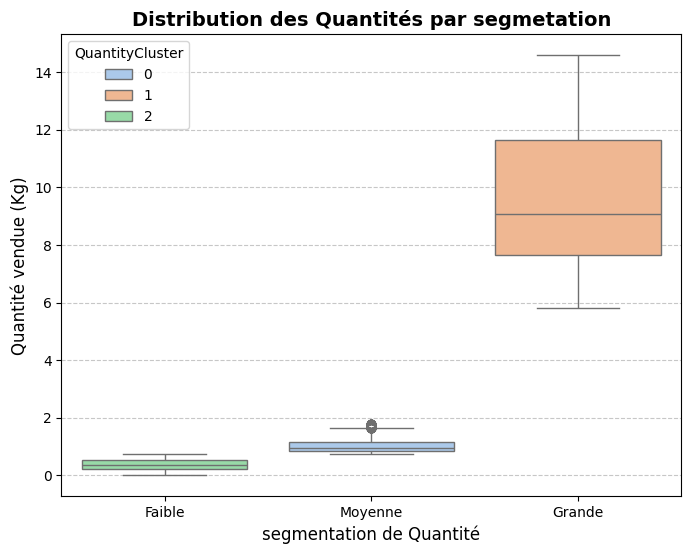

In [ ]:
sale_quantity(vente_not_seasonal , 'QuantityCluster', 'QuantityKg')

- Le cluster 0 représente les ventes avec une quantité moyenne.

- Le cluster 1 représente les ventes avec une grande quantité.

- Le cluster 2 représente les ventes avec une faible quantité.

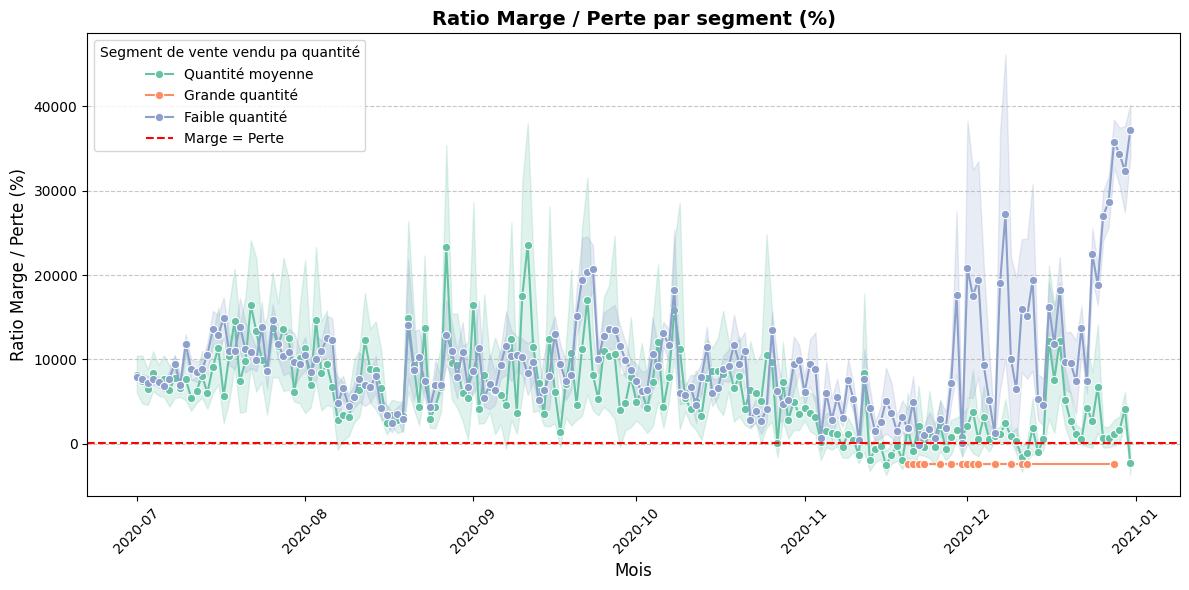

In [4]:
ratio_marge(vente_not_seasonal)

 - Les ventes de petites et moyennes quantités deviennent rentables dès juillet et jusqu’à la mi-octobre, avec un ratio supérieur à 100 %.

- Les ventes en grandes quantités n’apparaissent qu’à partir de la mi-novembre et demeurent légèrement en dessous de 100 %, indiquant qu’elles ne génèrent pas encore de marge suffisante pour compenser les pertes.

- Des pics sont observés pour les ventes en faibles quantités dès le début du mois de décembre, signalant une période de forte rentabilité pour ce segment

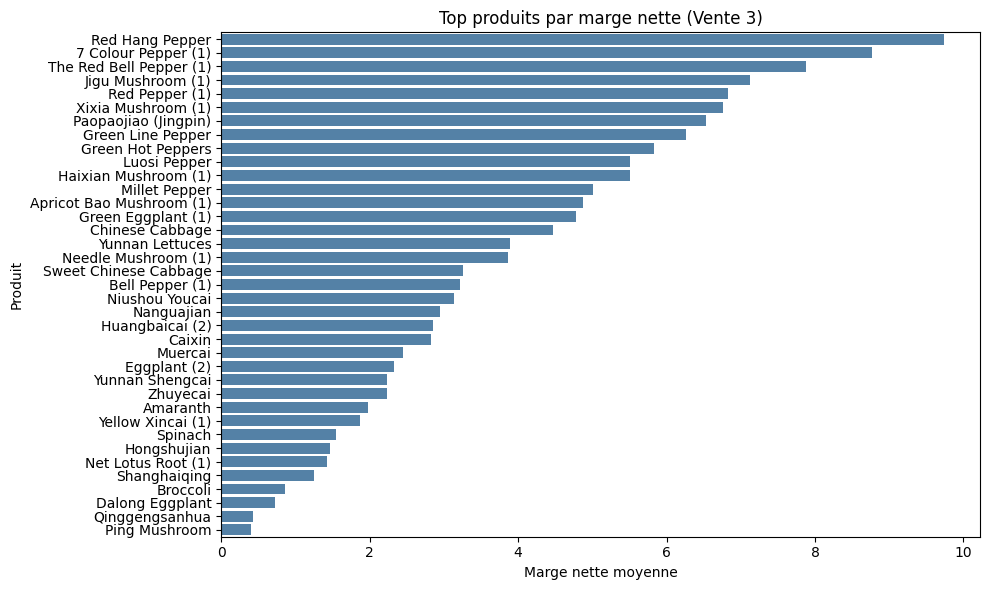

In [3]:
marge_par_produit(vente_not_seasonal)

- Après avoir filtré les ventes de petites quantités présentant une rentabilité élevée :

- Les produits affichent des marges nettes supérieures. Parmi eux, Red Hang Pepper et 7 Colour Pepper se distinguent comme des produits phares (inportantes).

- Ces produits devraient être priorisés dans les actions promotionnelles et la gestion des stock

In [4]:
import pandas as pd 

ventes_seasonal  = pd.read_csv('../data/reports/ventes_seasonal.csv', index_col='SaleDate', parse_dates=True)

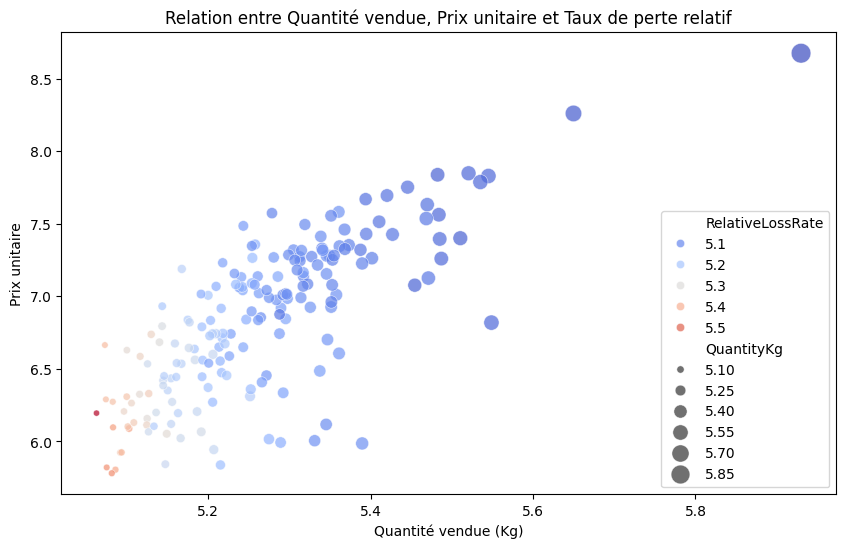

In [5]:
relation_prix(ventes_seasonal)

- Ce graphique montre que plus la quantité vendue est élevée, plus le prix tend à augmenter, ce qui reflète des ventes rentables.

- Les produits à bas prix présentent des pertes plus importantes, tandis que les produits à prix élevé affichent généralement des pertes plus faibles.

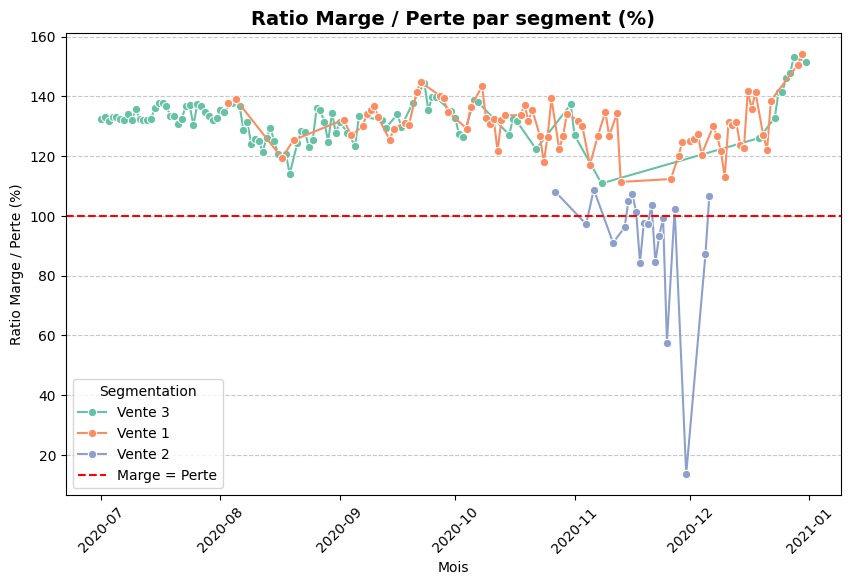

In [8]:
ratio_marge(ventes_seasonal)

- Le vente 1 et 3 maintiennent des marges positives avec une amélioration vers la fin de la période.

- Le vente 2 montre une dégradation marquée en fin d'année 2020, passant d'un équilibre à une perte notable.

# Conclusions et recommandations

+ Après une analyse approfondie des données de juillet 2020 à janvier 2021,plusieurs observations clés émergent pour les segments Vente 1, Vente 2 et Vente 3 :



Quantité et Prix : Les quantités vendues et les prix (unitaire et gros) montrent des variations, avec Vente 2 affichant une hausse notable des prix en fin 2020-11, suggérant une demande accrue ou une stratégie de tarification spécifique.

Ratio Marge/Perte : Vente 1 et Vente 3 maintiennent des marges positives , tandis que Vente 1 subit une chute significative , indiquant une perte potentielle à surveiller.

Taux de Perte et Marge : Les pertes restent stables , mais les marges varient . Vente 3 se distingue par une marge élevée en décembre, tandis que Vente 2 montre une faiblesse en novembre.


## Recommandations :

- Renforcer l'analyse des facteurs influençant la baisse de Vente 1 pour limiter les pertes.

- Capitaliser sur la performance de Vente 3 en fin d'année pour optimiser la rentabilité.

- Surveiller les ajustements de prix de Vente 2 pour maintenir sa compétitivité.
